Author: Edward Moradian<br>
Date: 09/14/2018<br>

Description of Program: The following program generates 500 random points along a range of (-50,50) and labels each point's color by the distance from the origin.  The closer to the origin, the more red a point is.  The farther away from the origin, the more blue a point is.

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
from sklearn.preprocessing import MinMaxScaler

# Creating 500 random numbers from a range of (-50,50) for x-values and y-values
np.random.seed(1)
x = np.random.randint(-50,50,500)
y = np.random.randint(-50,50,500)
lenx = len(x)

# Creating an array of zeros to represent the origin in the distance calculation
zeros = np.zeros((lenx,2),dtype=int)
color = np.zeros((lenx,3),dtype=int)

# Stack x-values and y-values together to make points
points = np.column_stack((x,y))

# Calculate the distance for each point in its distance from the origin
for q in range(len(zeros)):
    dist = scipy.spatial.distance.cdist(points,[zeros[q]])

# Scale the distance to be value from (0,1) to match the distribution of color values in matplotlib (a range of 0 to 1)
scaler = MinMaxScaler()
scaler.fit(dist)
dist = scaler.transform(dist)

# Combine distance information to each point. Then, sort each point in ascending order of distance
pointsInfo = np.concatenate((points,dist),axis=1)
pointsInfoSort = pointsInfo[pointsInfo[:,2].argsort()]



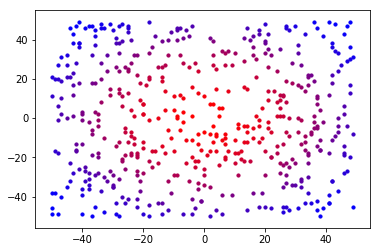

In [83]:
import matplotlib.pyplot as plt

# i for iterating through colors and j for iterating through our matrix of points
# i and j will have a total of 500 iterations and therefore each point will iterate and will each have a unique color
# through the entire spectrum that goes from red to blue

i=0
j=0

while i <= 1:
    color=(1-i,0,0+i)
    plt.scatter(pointsInfoSort[j,0], pointsInfoSort[j,1], s=10, c=color)
    i += .002    
    j += 1

plt.show()